**Import** **Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

**Import Dataset**

In [ ]:
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, y_train.shape, "*************",X_test.shape, y_test.shape

((60000, 28, 28), (60000,), '*************', (10000, 28, 28), (10000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

**Creating Class labels**

In [ ]:
class_labels = [	"T-shirt/top", "Trouser",	"Pullover",	"Dress",	"Coat", "Sandal",	"Shirt", "Sneaker", "Bag",	"Ankle boot"]

In [ ]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

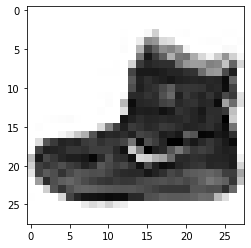

In [ ]:
plt.imshow(X_train[0], cmap = 'Greys')

**Displaying Dataset**

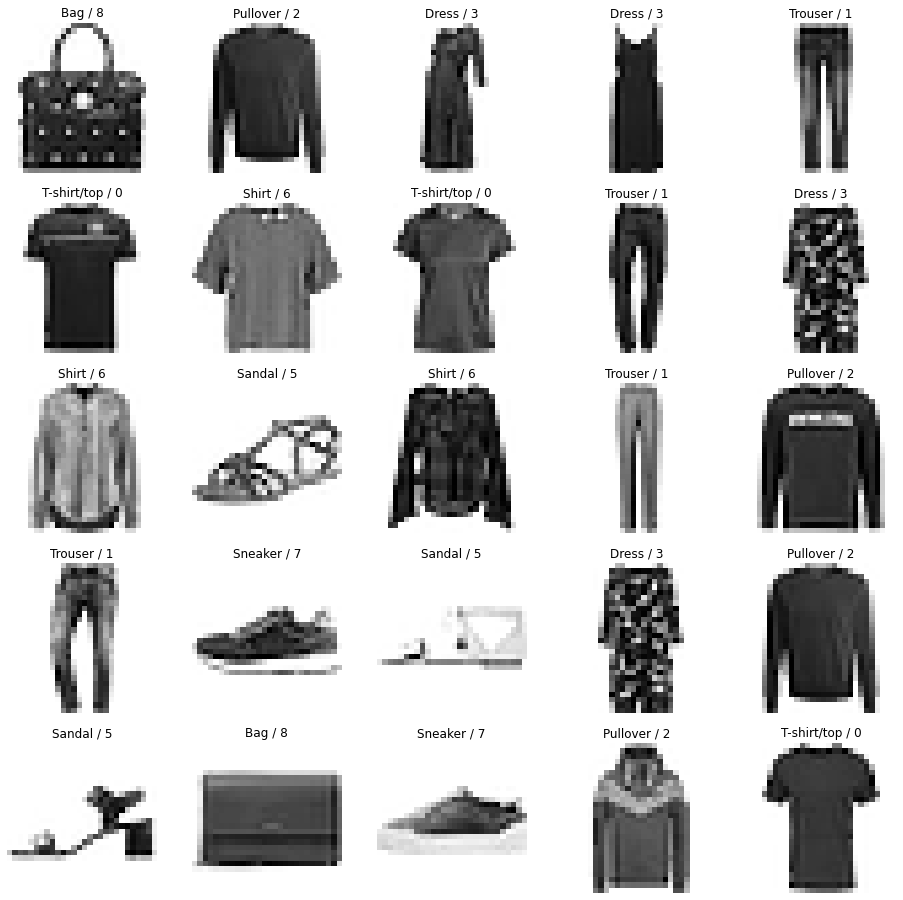

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j)
  j+=1
  plt.imshow(X_train[i], cmap= 'Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [ ]:
X_train.ndim

3

In [ ]:
X_train = np.expand_dims(X_train,-1)

In [ ]:
X_train.ndim

4

In [ ]:
X_test = np.expand_dims(X_test,-1)

In [ ]:
X_test.ndim

4

**Feature Scaling**

In [ ]:
X_train = X_train/255
X_test = X_test/255

**Split Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_Validation, y_train, y_Validation = train_test_split(X_train, y_train, test_size=0.2,random_state= 2020)


In [ ]:
X_train.shape, X_Validation.shape, y_train.shape, y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

**Building CNN Model**

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(filters = 32, kernel_size= 3, strides=(1,1), padding='valid', activation = 'relu', input_shape=[28,28,1]),
                                 keras.layers.MaxPooling2D(pool_size=(2,2)),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units = 128, activation= 'relu'),
                                 keras.layers.Dense(units = 10, activation = 'softmax')
                                 ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

**Compile**

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

**Training**

In [ ]:
model.fit(X_train, y_train, epochs = 10, batch_size= 512, verbose=1, validation_data= (X_Validation, y_Validation))

Epoch 1/10
94/94 [==============================] - 21s 218ms/step - loss: 0.6594 - accuracy: 0.7773 - val_loss: 0.4511 - val_accuracy: 0.8431
Epoch 2/10
94/94 [==============================] - 22s 239ms/step - loss: 0.3985 - accuracy: 0.8607 - val_loss: 0.3946 - val_accuracy: 0.8633
Epoch 3/10
94/94 [==============================] - 20s 217ms/step - loss: 0.3529 - accuracy: 0.8760 - val_loss: 0.3462 - val_accuracy: 0.8809
Epoch 4/10
94/94 [==============================] - 30s 316ms/step - loss: 0.3183 - accuracy: 0.8874 - val_loss: 0.3626 - val_accuracy: 0.8738
Epoch 5/10
94/94 [==============================] - 24s 260ms/step - loss: 0.2971 - accuracy: 0.8960 - val_loss: 0.3224 - val_accuracy: 0.8870
Epoch 6/10
94/94 [==============================] - 24s 257ms/step - loss: 0.2775 - accuracy: 0.9015 - val_loss: 0.3053 - val_accuracy: 0.8932
Epoch 7/10
94/94 [==============================] - 33s 348ms/step - loss: 0.2603 - accuracy: 0.9072 - val_loss: 0.2933 - val_accuracy: 0.8966

**Prediction**

In [ ]:
y_pred = model.predict(X_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.01, 0.  , 0.  , ..., 0.  , 0.95, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.21, 0.05, 0.01]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2834 - accuracy: 0.8969


[0.2834046483039856, 0.8968999981880188]

**Figure Plot**

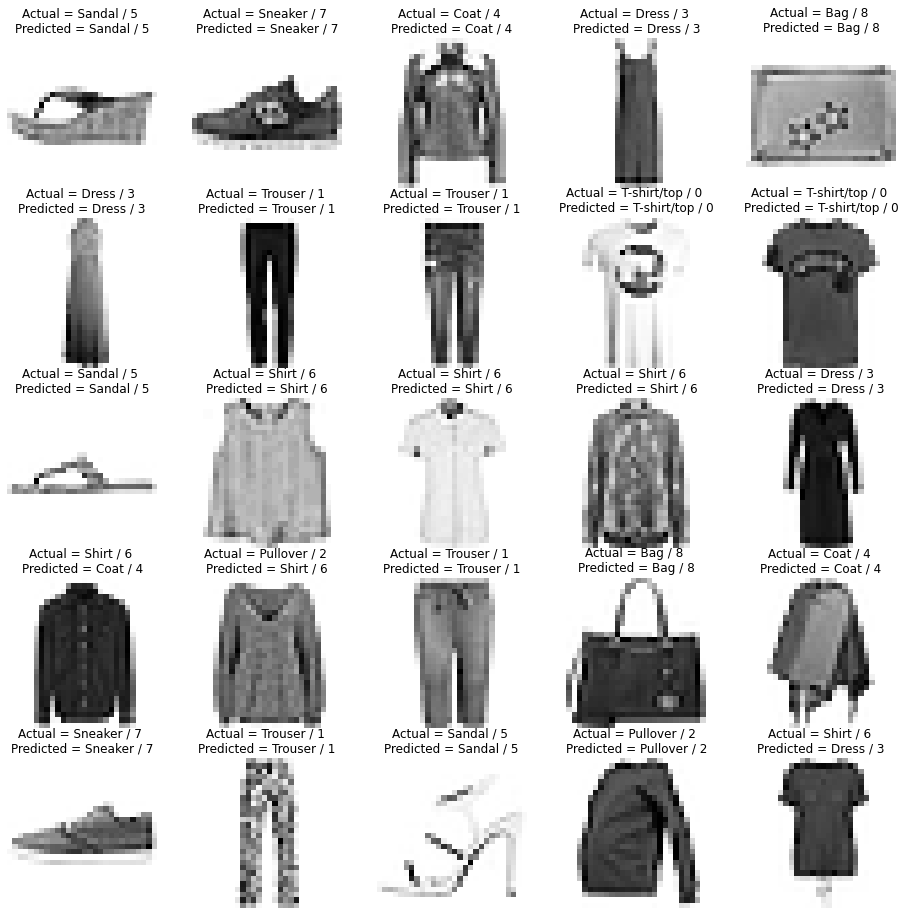

In [ ]:
plt.figure(figsize = (16,16))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j)
  j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]],y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

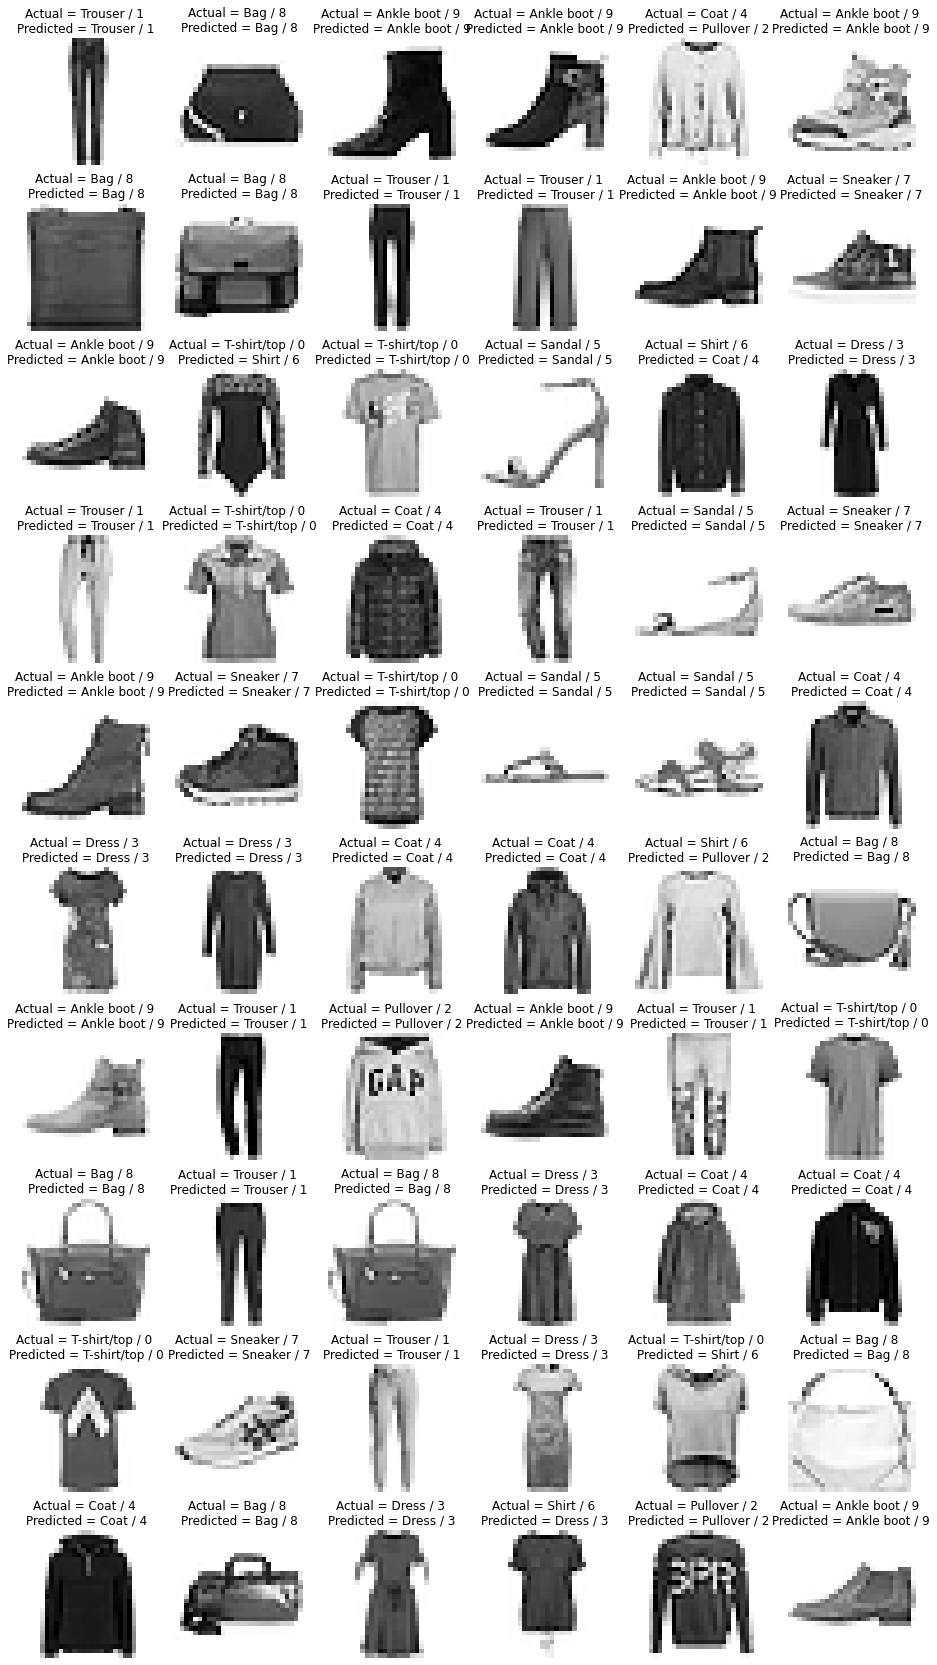

In [ ]:
plt.figure(figsize = (16,30))

j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j)
  j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]],y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

**HeatMap**

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.88      0.85      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.77      0.89      0.83      1000
       Dress       0.88      0.91      0.90      1000
        Coat       0.87      0.79      0.83      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.77      0.65      0.70      1000
     Sneaker       0.93      0.98      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



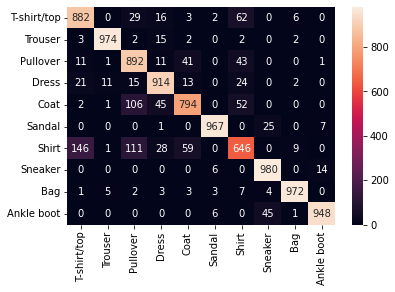

In [ ]:
sns.heatmap(cm, annot = True, fmt = 'd', xticklabels =class_labels, yticklabels = class_labels)

from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_labels, target_names = class_labels)
print(cr)

**Save Model**

In [ ]:
model.save('fashion_mnist_cnn_model.h5')

**Building 2 Complex CNN Model**

In [ ]:
cnn_model2 = keras.models.Sequential([
                                      keras.layers.Conv2D(filters = 32, kernel_size = 3, strides = (1,1), padding = 'valid', activation = 'relu', input_shape = [28,28,1] ),
                                      keras.layers.MaxPooling2D(pool_size = (2,2)),
                                      keras.layers.Conv2D(filters = 64, kernel_size = 3, strides = (1,1), padding = 'same', activation = 'relu',),
                                      keras.layers.MaxPooling2D(pool_size = (2,2)),
                                      keras.layers.Flatten(),
                                      keras.layers.Dense(units = 128, activation = 'relu'),
                                      keras.layers.Dropout(.25),
                                      keras.layers.Dense(units = 256, activation = 'relu'),
                                      keras.layers.Dropout(.25),
                                      keras.layers.Dense(units = 128, activation = 'relu'),
                                      keras.layers.Dense(units = 10, activation = 'softmax'),
])

In [ ]:
cnn_model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn_model2.fit(X_train,y_train, epochs = 20, batch_size = 512, verbose = 1, validation_data = (X_Validation, y_Validation))

cnn_model2.save('fashion_mnist_cnn_model2.h5')

Epoch 1/20
94/94 [==============================] - 53s 561ms/step - loss: 0.8913 - accuracy: 0.6636 - val_loss: 0.5121 - val_accuracy: 0.8002
Epoch 2/20
94/94 [==============================] - 54s 574ms/step - loss: 0.4930 - accuracy: 0.8123 - val_loss: 0.4174 - val_accuracy: 0.8445
Epoch 3/20
94/94 [==============================] - 53s 558ms/step - loss: 0.4023 - accuracy: 0.8525 - val_loss: 0.3513 - val_accuracy: 0.8704
Epoch 4/20
94/94 [==============================] - 57s 609ms/step - loss: 0.3557 - accuracy: 0.8705 - val_loss: 0.3257 - val_accuracy: 0.8770
Epoch 5/20
94/94 [==============================] - 52s 555ms/step - loss: 0.3231 - accuracy: 0.8832 - val_loss: 0.3058 - val_accuracy: 0.8886
Epoch 6/20
94/94 [==============================] - 57s 604ms/step - loss: 0.2972 - accuracy: 0.8909 - val_loss: 0.2829 - val_accuracy: 0.8968
Epoch 7/20
94/94 [==============================] - 48s 514ms/step - loss: 0.2791 - accuracy: 0.8978 - val_loss: 0.2827 - val_accuracy: 0.8956

In [ ]:
cnn_model2.evaluate(X_test, y_test)

**Building Very Complex Model**

In [ ]:
cnn_model3 =  keras.models.Sequential([
                                      keras.layers.Conv2D(filters = 64, kernel_size = 3, strides = (1,1), padding = 'valid', activation = 'relu', input_shape = [28,28,1] ),
                                      keras.layers.MaxPooling2D(pool_size = (2,2)),
                                      keras.layers.Conv2D(filters = 128, kernel_size = 3, strides = (2,2), padding = 'same', activation = 'relu',),
                                      keras.layers.MaxPooling2D(pool_size = (2,2)),
                                      keras.layers.Conv2D(filters = 64, kernel_size = 3, strides = (2,2), padding = 'same', activation = 'relu',),
                                      keras.layers.MaxPooling2D(pool_size = (2,2)),
                                      keras.layers.Flatten(),
                                      keras.layers.Dense(units = 128, activation = 'relu'),
                                      keras.layers.Dropout(.25),
                                      keras.layers.Dense(units = 256, activation = 'relu'),
                                      keras.layers.Dropout(.5),
                                      keras.layers.Dense(units = 256, activation = 'relu'),
                                      keras.layers.Dropout(.25),
                                      keras.layers.Dense(units = 128, activation = 'relu'),
                                      keras.layers.Dropout(.1),
                                      keras.layers.Dense(units = 10, activation = 'softmax'),
])

**Compile**

In [ ]:
cnn_model3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

**Training**

In [ ]:
cnn_model2.fit(X_train,y_train, epochs = 50, batch_size = 512, verbose = 1, validation_data = (X_Validation, y_Validation))

cnn_model3.save('fashion_mnist_cnn_model3.h5')

cnn_model3.evaluate(X_test, y_test)